## Learning EDA from Historic Diaster "The Titanic Wreck

### Objective

### 2. Data  Description

In [ ]:
!pip install pandas_profiling

In [3]:
import numpy as np               # For linear algebra
import pandas as pd              # For data manipulation
import matplotlib.pyplot as plt  # For 2D visualization
import seaborn as sns
%matplotlib inline

In [74]:
df =sns.load_dataset("titanic")

In [75]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [76]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [77]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [78]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


### **Examining Data**

In [79]:
df.shape

(891, 15)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [81]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [82]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [83]:
df['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [84]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [85]:
df['pclass'].unique()

array([3, 1, 2], dtype=int64)

In [86]:
df['class'].value_counts().sort_values(ascending = True)

class
Second    184
First     216
Third     491
Name: count, dtype: int64

In [87]:
df['age'].value_counts(ascending = True)

age
74.0     1
14.5     1
70.5     1
12.0     1
36.5     1
        ..
30.0    25
19.0    25
18.0    26
22.0    27
24.0    30
Name: count, Length: 88, dtype: int64

In [88]:
df['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [89]:
df.groupby('sex')['survived'].value_counts()

sex     survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [90]:
df.survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [91]:
df.groupby('pclass')['survived'].value_counts()

pclass  survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [92]:
import os

### Treating Outliers

In [93]:
df.fare.unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [94]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [95]:
Q1

7.9104

In [96]:
Q3

31.0

In [97]:
IQR

23.0896

In [98]:
lower_limit

-26.724

In [99]:
upper_limit

65.6344

In [100]:
Q1,Q3,IQR,lower_limit,upper_limit

(7.9104, 31.0, 23.0896, -26.724, 65.6344)

In [101]:
titanic_data_with_outlier = df[(df['fare'] <= lower_limit) | (df['fare'] >= upper_limit)]

In [102]:
titanic_data_with_outlier

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
34,0,1,male,28.0,1,0,82.1708,C,First,man,True,NaN,Cherbourg,no,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,0,3,male,NaN,8,2,69.5500,S,Third,man,True,NaN,Southampton,no,False
849,1,1,female,NaN,1,0,89.1042,C,First,woman,False,C,Cherbourg,yes,False
856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,NaN,Southampton,yes,False
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False


In [103]:
titanic_data_with_outlier.shape

(116, 15)

C:\Users\amitm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


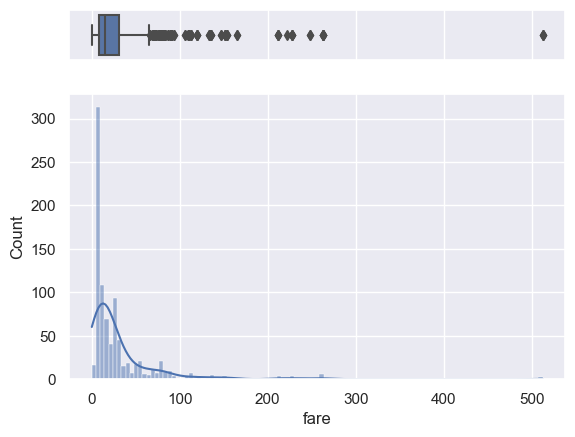

In [104]:
sns.set(style='darkgrid')
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,gridspec_kw={'height_ratios': (.15, .85)})
sns.boxplot(data=df, x='fare', ax=ax_box)
sns.histplot(data=df, x= 'fare', ax=ax_hist, kde=True)
ax_box.set(xlabel='')
plt.show()

#### Data Preprocessing

In [105]:
miss1=df.isnull().sum()

miss= (df.isnull().sum()/len(df))*100

miss_data=pd.concat([miss1,miss],axis=1,keys=['Total','%'])

print(miss_data)

             Total          %
survived         0   0.000000
pclass           0   0.000000
sex              0   0.000000
age            177  19.865320
sibsp            0   0.000000
parch            0   0.000000
fare             0   0.000000
embarked         2   0.224467
class            0   0.000000
who              0   0.000000
adult_male       0   0.000000
deck           688  77.216611
embark_town      2   0.224467
alive            0   0.000000
alone            0   0.000000


In [106]:
miss1

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [107]:
miss

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

### **Filling missing age by median**

In [108]:
df.age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [109]:
new_age1 = df.age.mean()  

In [110]:
new_age1

29.69911764705882

In [111]:
new_age = df.age.median()  

In [112]:
new_age

28.0

In [113]:
df.age.fillna(new_age, inplace = True)

In [114]:
df["age"].isnull().sum()

0

In [115]:
age_Q1 = df['age'].quantile(0.25)
age_Q3 = df['age'].quantile(0.75)

age_IQR = age_Q3 - age_Q1

age_lower_limit = age_Q1 - 1.5 * age_IQR
age_upper_limit = age_Q3 + 1.5 * age_IQR

In [61]:
age_lower_limit

2.5

In [62]:
age_upper_limit

54.5

In [117]:
df.age.unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [119]:
df[(df['age'] == 28)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,28.0,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,28.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,28.0,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
26,0,3,male,28.0,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,0,3,male,28.0,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
874,1,2,female,28.0,1,0,24.0000,C,Second,woman,False,NaN,Cherbourg,yes,False
878,0,3,male,28.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True


In [122]:
df['embarked'].isnull().sum()

2

In [128]:
emb_mode = df['embarked'].mode()

In [129]:
df["embarked"] = df["embarked"].fillna(emb_mode)

In [130]:
df["embarked"].isna().sum()

2

In [134]:
df["embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [133]:
df["embarked"].fillna("S", inplace = True)

In [135]:
df["embarked"].isna().sum()

0

In [137]:
df["embark_town"] = df["embark_town"].mode()

In [138]:
df["embark_town"]

0      Southampton
1              NaN
2              NaN
3              NaN
4              NaN
          ...     
886            NaN
887            NaN
888            NaN
889            NaN
890            NaN
Name: embark_town, Length: 891, dtype: object

In [140]:
df.deck

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [144]:
df.drop("deck", axis = 1, inplace = True)

In [145]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,NaN,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,NaN,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,NaN,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,NaN,yes,True
